### 1 Predator Prey Model

$\\$ a. Find all equilibria for this dynamical system and interpret the ecological meaning of each one.

Equilibrium 1: $y=0, x=0$. There is no Prey nor Predator Population, so no changes in population can take place.

Equilibrium 2: $y=0, x=k$. The Prey Population is at capacity while there is no Predator population to impact the prey population.

Equilibrium 3: $y=\frac{a}{b}(1-\frac{c}{dK}), x=\frac{c}{d}$. The Prey population is at the ideal amount to sustain the Predator while both maintain their same population.

$\\$ b. Formulate and solve a learning problem to fit this data using a continuous-time dynamical system. Report your estimates of all the parameters and plot the predictions of your model versus time on the same axes as the data.

We can set up this learning problem as follows:

$$min ||v(t) - F(\theta, t)||_2$$

where $v(t) = [x(t), y(t)]$ and $F(\theta, t)$ is the model at time t with parameters (a,b,c,d,K).

$\\$ c. Approximate each derivative with a forward difference to obtain a discrete time approximations of the system in. Using thsi difference equation, formulate and solve a learning problem to fit this data using a discrete-time dynamical system. Report your estimates of all the parameters and add the predictions of this model to the axes in part b.


$\\$ d. For the model in part c, calculate the FIM and report the estimated uncertainty in each of your paramters.

In [166]:
# Code for Part 1.C
import numpy as np
from scipy.optimize import minimize, least_squares
import matplotlib.pyplot as plt

years = [i for i in range(22)] # 1995 to 2016
elk = [16250, 16250, 13500, 11700, 11750, 14500, 13500, 12000,  9100, 8200, 9500, 8150, 6800, 6200, 7100, 6050, 4600, 4050, 3950, 4450, 4950, 5000] # elk population
wolves = [21, 24, 32, 48, 44, 72, 77, 84, 98, 84, 54, 75, 94, 56, 40, 38, 38, 34, 34, 41, 50, 41] # wolf population

elk = np.log(elk)
wolves = np.log(wolves)


def cost(theta):
    a, b, c, d, k = theta[0], theta[1], theta[2], theta[3], theta[4]
    x_k,y_k  = elk[0], wolves[0]
    out = []
    A = np.array([[1+a, 0, -b, -a/k], [0, 1-c, d, 0]])
    for i in range(1,22):
        b =  A @ np.array([x_k, y_k , x_k*y_k , x_k**2])
        x_k, y_k = b[0], b[1]
        out.append(abs(x_k - elk[i]))
        out.append(abs(y_k - wolves[i]))
    return out

def f(theta):
    a, b, c, d, k = theta[0], theta[1], theta[2], theta[3], theta[4]
    x_k,y_k  = elk[0], wolves[0]
    x,y = [elk[0]], [wolves[0]]
    A = np.array([[1+a, 0, -b, -a/k], [0, 1-c, d, 0]])
    for i in range(1,22):
        b =  A @ np.array([x_k, y_k , x_k*y_k , x_k**2])
        x_k, y_k = b[0], b[1]
        x.append(x_k)
        y.append(y_k)
    return x,y


theta_0 = [.00033,.1,.3,.004, 10]
v = least_squares(cost, theta_0, method="lm")
theta = v["x"]
print("Cost: " + str(np.linalg.norm(cost(theta),2)) + " ---- Theta: " + str(np.abs(np.log(theta))))

Cost: 1.4439591375845267 ---- Theta: [1.94896242 4.48343999 0.29286341 2.48314356 2.51351153]


C:\Users\davee\AppData\Local\Temp\ipykernel_10428\670783581.py:20: RuntimeWarning: overflow encountered in double_scalars
  b =  A @ np.array([x_k, y_k , x_k*y_k , x_k**2])
C:\Users\davee\AppData\Local\Temp\ipykernel_10428\670783581.py:20: RuntimeWarning: invalid value encountered in matmul
  b =  A @ np.array([x_k, y_k , x_k*y_k , x_k**2])


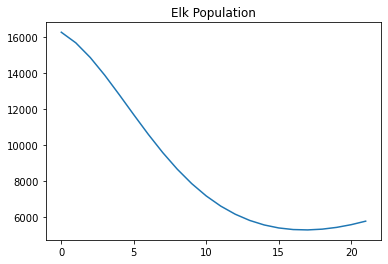

In [167]:
x,y = f(theta)
plt.title("Elk Population")
plt.plot(years, [np.exp(i) for i in x])

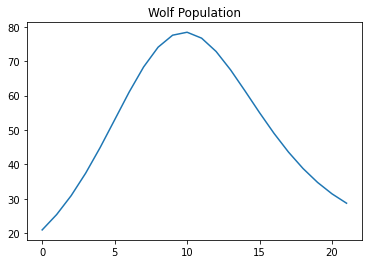

In [168]:
plt.title("Wolf Population")
plt.plot(years, [np.exp(i) for i in y])

In [ ]:
def jacob(theta):
    a, b, c, d, k = theta[0], theta[1], theta[2], theta[3], theta[4]
    x_k,y_k  = 162.5, .21
    x,y = [16250], [21]
    A = np.array([[1+a, 0, -b, -a/k], [0, 1-c, d, 0]])


def FIM(theta):
    s= 4.8/(np.sqrt(17))
    J = jacob(theta)
    return s**(-2)*(J @ J.T)

### 2 Negotiation as a Dynamical System

$\\$ Write the dynamic state equations (in matrix form) for the situation described above.

Let x be the demand from Labor and y the demand from Management. Then the new demand x would be the previous offer plus $\alpha$ multiplied by the difference between the offer y from Management. Similarly new offer y would be the previous offer plus $\beta$ multiplied by the difference between the offer y from Management.

$$\frac{dx}{dt} = x + \beta(y-x) = (1-\beta)x + \beta y$$
$$\frac{dy}{dt} = y - \alpha(y-x) = (1-\alpha)y +\alpha x$$

This gives us the dynamic state equations:

$$\begin{bmatrix}
    x_{k+1} \\
    y_{k+1}
  \end{bmatrix} = \begin{bmatrix}
    \beta &(1-\beta) \\
    (1-\alpha) & \alpha
  \end{bmatrix} \begin{bmatrix}
    x_k \\
    y_k
  \end{bmatrix}$$

### 3 Algorithm Analysis for Estimating Square Roots

$\\$ a. Where are the equilibria for the system in (1)? Are there more than one? Why is this appropriate for th problem it is attempting to solve?

$$ x = x + a - x^2$$
$$\implies x^2 = a$$
$$\implies x = \pm \sqrt{a}$$

$\\$ b. Linearize the system in (1) around the equilibrium point $ x = \sqrt{a}$.

$$dx_{k+1} = x_{k+1} - x_0 = \frac{df}{dx}(x_k-x)$$

$$\implies dx_{x+1} = (1-2\sqrt{a})x$$

$\\$ c. Under what conditions on a is this equilibrium point stable? Showing stability to the right equilibrium point is often how correctness of an algorithm is proven-it is correct because the equilibrium point is the right answer for each allowed instance of the problem.

The equilibrium is safe for $0 \leq \sqrt{a} \leq 1$.

$\\$ d. Use the eigenvalue of the linearized system to comment on the rate of convergence of the algorithm. Is this a fast or a slow algorithm, in your opiniion? Are there ways you could suggest to improve the algorithm' rate of convergence? Rates of convergence are related to the performance and efficiency of an algorithm; expressing an algorithm as a dynamical system enables a rich analysis characterizing many of its properties.

The solution for $x_{k+1}$ is $x_{k+1} = (1-2 \sqrt{a})^k x(0)$. Thus $x_{k+1}$ will converge when x(0) is positive.

### 4  National Economics as Dynamics


1. Put these expressions together to build a state space model of the economy. What is the minimum order for such a model? What is the input to the model? What are the state variables? What is the output?

$$C_{k+1} = m(C_k + I_k + G_k)$$



$$I_{k+1} = \mu (C_{k+1} - C_k)$$
$$ = \mu m (C_k + I_{k+1} + G_{k+1} - C_k - I_k - G_k)$$
$$ = \mu m (I_{k+1} + G_{k+1} - I_k - G_k)$$

$$\implies \begin{bmatrix}
    C_{k+1} \\
    I_{k+1}
  \end{bmatrix} = \begin{bmatrix}
    m & m \\
    \mu (m-1) & \mu m
  \end{bmatrix} \begin{bmatrix}
    C_k \\
    I_k
  \end{bmatrix} + \begin{bmatrix}
    m \\
    \mu m
  \end{bmatrix} G_k$$

2. What are the conditions on m and $\mu$ for the model to be stable?

To find the conditions for stability, we must first find the eigenvalues. These eigenvalues are found by the equation:

$$ \lambda = \frac{(m+ \mu m) \pm \sqrt{(m + \mu m)^2 - 4 \mu m}}{2}$$

with the condition that $| \lambda | \geq 1$.

3. Let m = 0.25 and $\mu = 0.5$. iF g[K] =10, what are the values of C, I, and Y for the system to be in equilibrium? If you start from this equilibrium, and then increase government spending by 10%, how does the system respond? Simulate it and plot the response of each variable in the system. Under what conditions does this model predict that government spending is valuable?

$$Ax_k + Bu_k = x_k$$
$$\implies Ax_k - x_k = -Bu_k$$
$$\implies x_k = -(A-I)^{-1}Bu_k$$

This yields the values, $C_k = \frac{10}{3}$ , $I_k = 0$, and $Y_k = C_k + 10 = \frac{40}{3} = 13.33$.

$\\$ Next, by increasing the government budget by 10% we found that $Y_k$ stabilized at 14.66. This was roughly a 10% increase to GDP. This implies that government spending can change the equilibrium point of $Y_k$, the GDP.